In [ ]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, classification_report, accuracy_score, precision_score, recall_score

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from zodiac.zodiac import Zodiac

## Load the data and store test and train labels seperately

In [19]:
#Load Data

data = load_breast_cancer()


In [20]:
df = pd.DataFrame(data = data.data,columns = data.feature_names)


In [21]:
df["Result"] = data.target

In [22]:
train, test = train_test_split(df, test_size=0.2)

In [23]:
train_x = train["Result"]
del train["Result"]

In [24]:
res = np.array(test["Result"])
del test["Result"]

## Train your models. For our experiments we will be trying two models: 
### 1) SVM Model

In [7]:
#Train the model

clf = SVC(gamma='auto')
clf.fit(train, train_x) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
#Generate Predictions


SVM_predictions = clf.predict(test)


In [9]:
#overall accuracy score is 0.6
print(classification_report(res,SVM_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.61      1.00      0.75        69

    accuracy                           0.61       114
   macro avg       0.30      0.50      0.38       114
weighted avg       0.37      0.61      0.46       114



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 2) Random Forest

In [25]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train, train_x) 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
RF_pred = clf.predict(test)

In [28]:
print(classification_report(res,RF_pred)) #overall accuracy is at 0.97

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Using zodiac for manual plots

In [10]:
#SVM ZODIAC
SVM_zod = Zodiac(train_data=train,test_data=test,test_labels=res, 
             test_predictions=SVM_predictions, model_type="binaryclass",dim_red="PCA")

/Users/apoorvashetty/ze/zodiac/zodiac.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.test_data["labels"] = test_labels
/Users/apoorvashetty/ze/zodiac/zodiac.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.test_data["predictions"] = test_predictions


In [29]:
#RF ZODIAC
RF_zod = Zodiac(train_data=train,test_data=test,test_labels=res, 
             test_predictions=RF_pred, model_type="binaryclass",dim_red="PCA")

/Users/apoorvashetty/ze/zodiac/zodiac.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.test_data["labels"] = test_labels
/Users/apoorvashetty/ze/zodiac/zodiac.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.test_data["predictions"] = test_predictions


In [14]:
SVM_zod.set_metrics(metrics=["f1","accuracy","recall","precision"]) #set required metrics

SVM_zod.split_manual_grid(h=100) #split manual grid with height 50

Setting metrics..
Metrics set
Splitting the data into grids...
Generating density matrix...
Completed


In [36]:
RF_zod.set_metrics(metrics=["f1","accuracy","recall","precision"]) #set required metrics

RF_zod.split_manual_grid(h=100) #split manual grid with height 50

Setting metrics..
Metrics set
Splitting the data into grids...
Generating density matrix...
Completed


No handles with labels found to put in legend.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

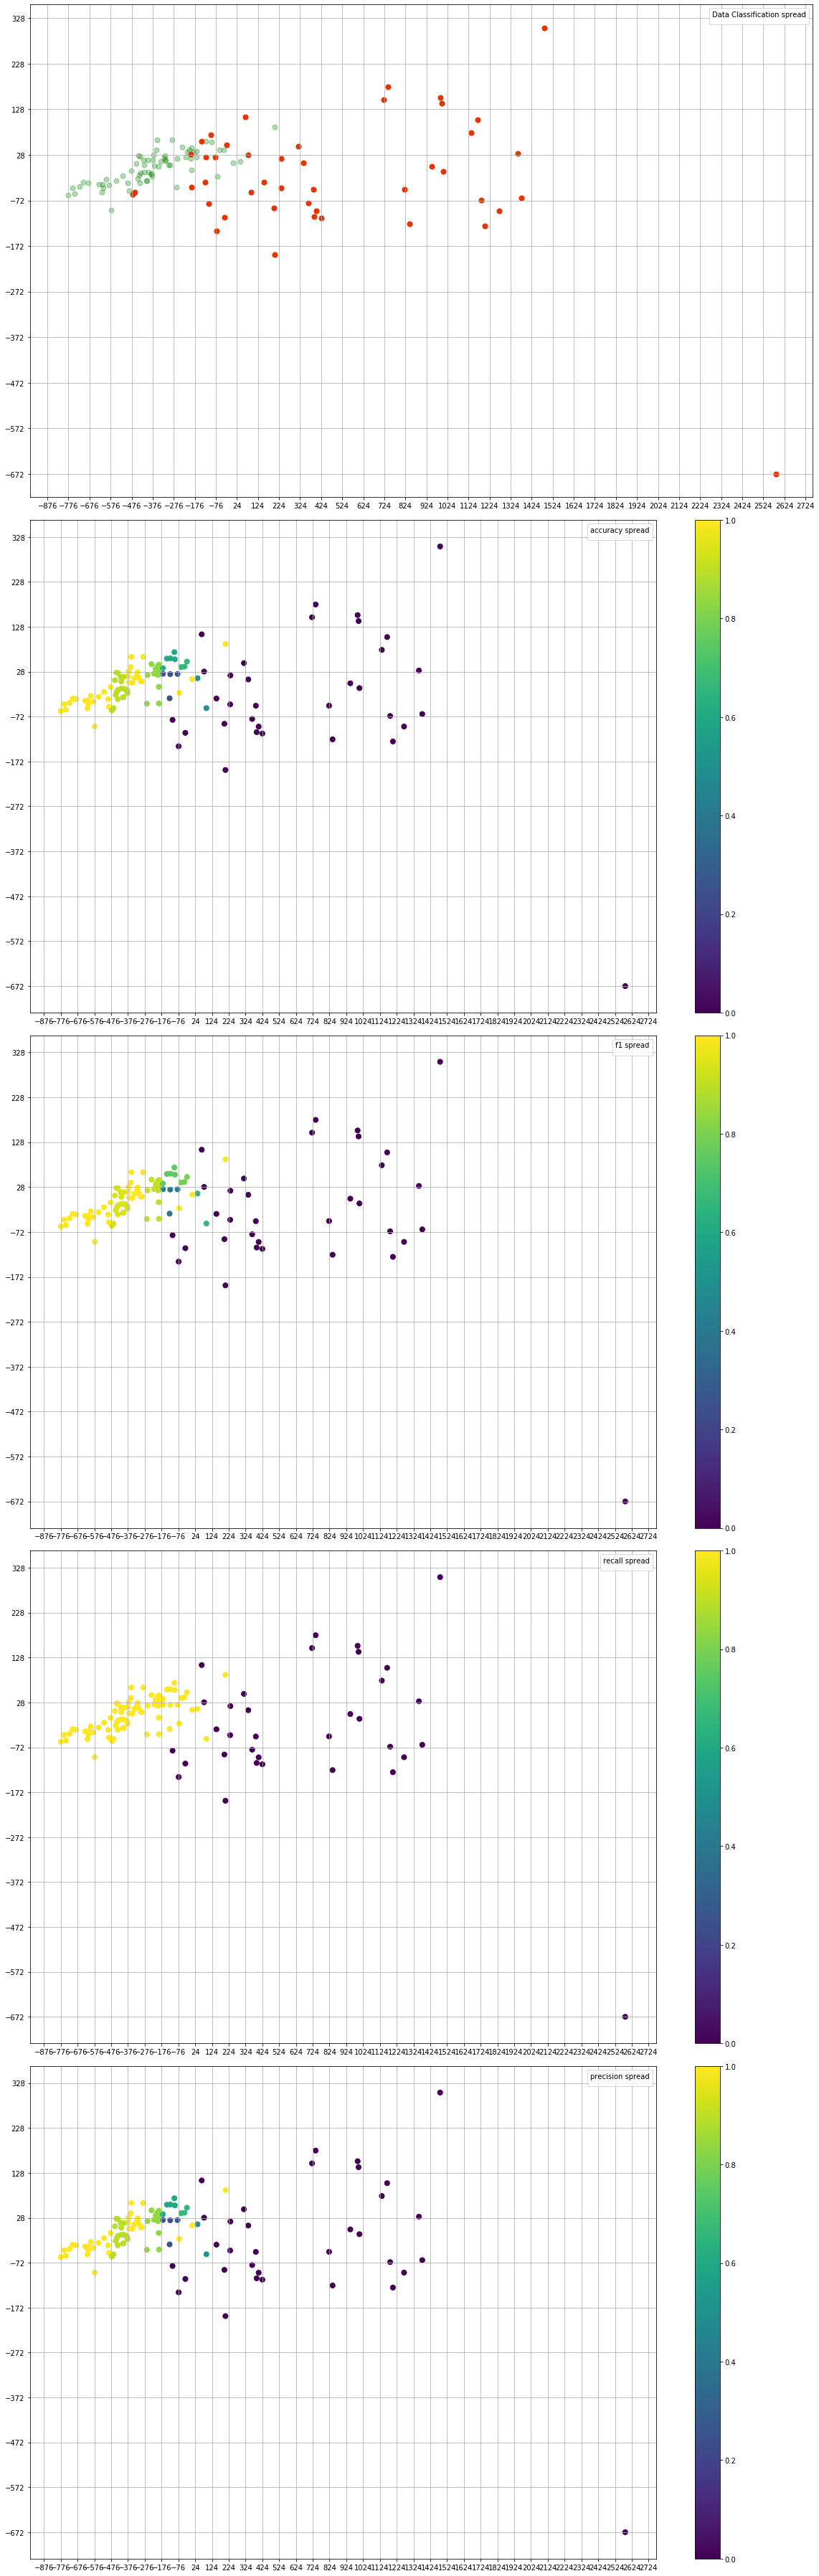

In [33]:
SVM_zod.split_plot(metrics=["accuracy","f1","recall","precision"]) #plot the metrics you'd like to visualiza

No handles with labels found to put in legend.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

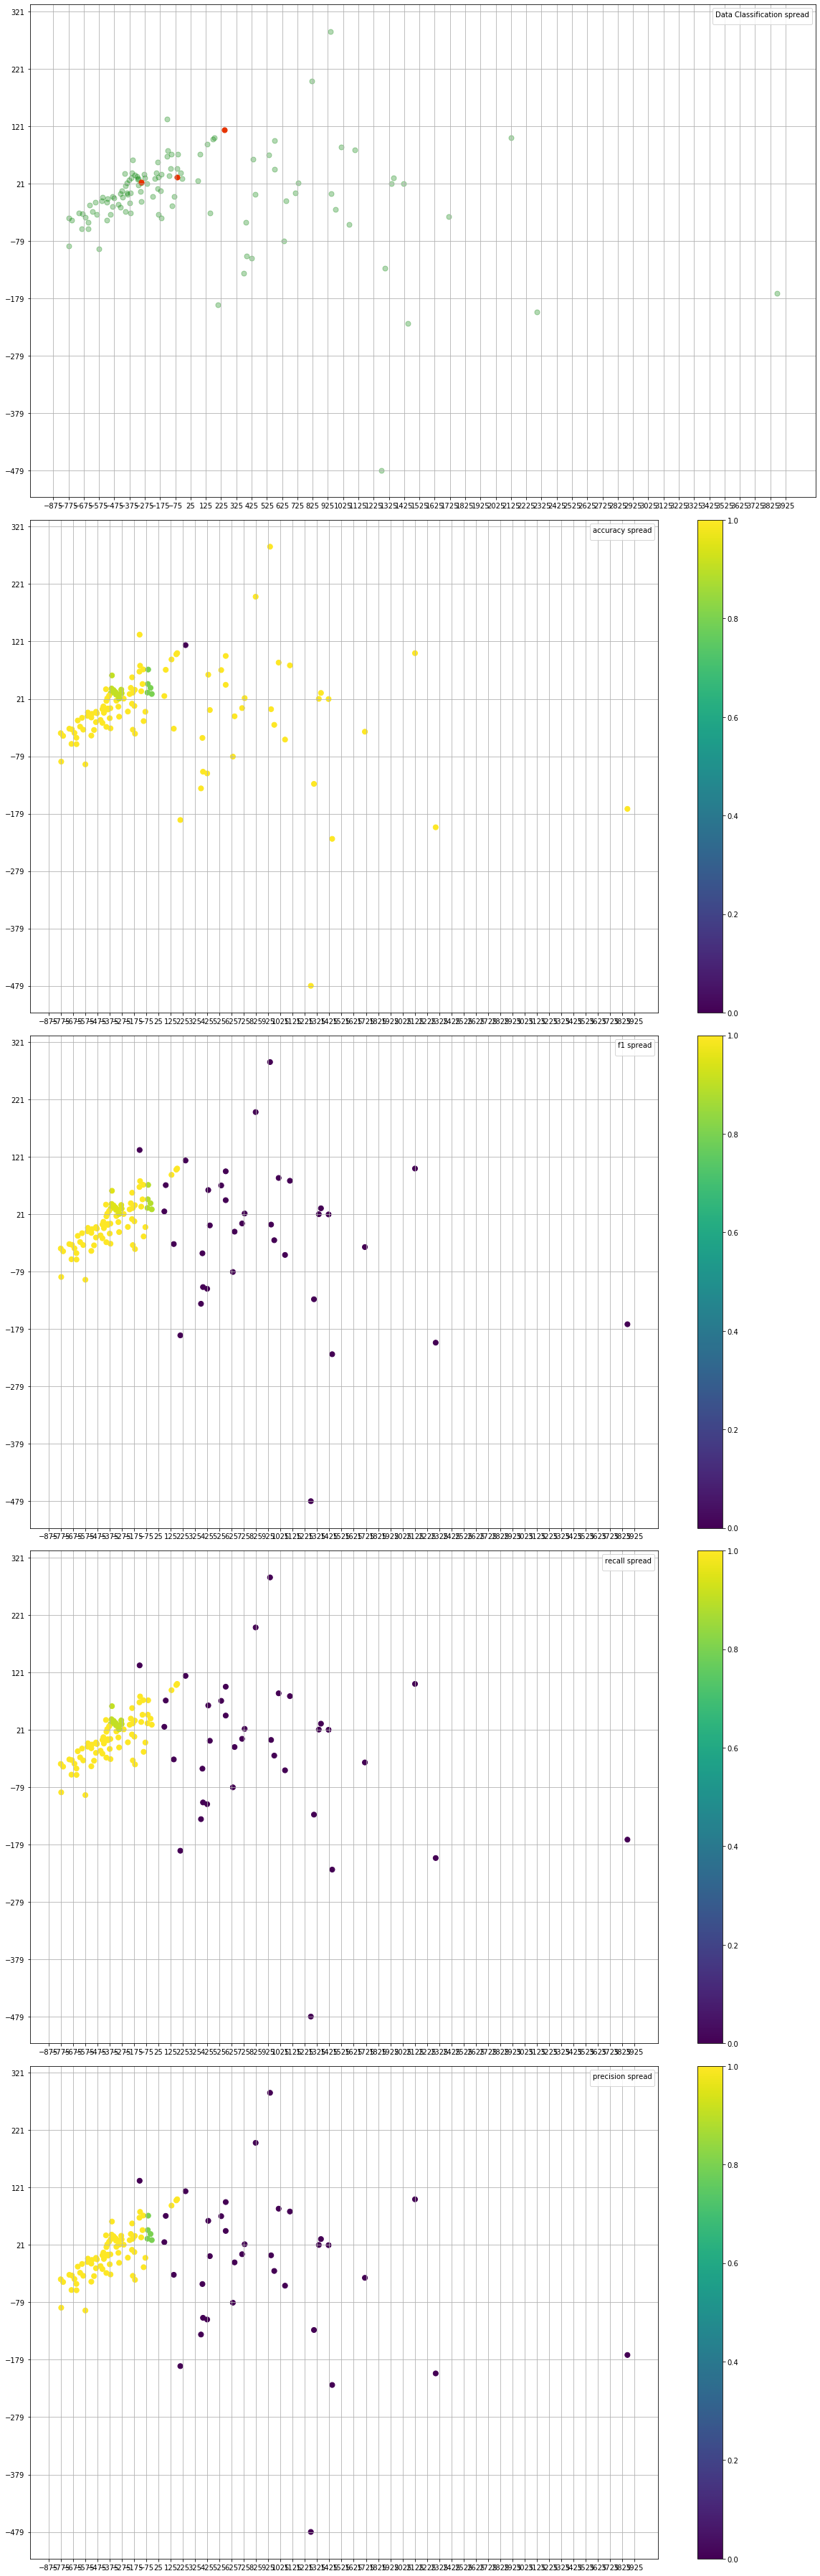

In [37]:
RF_zod.split_plot(metrics=["accuracy","f1","recall","precision"])

### It's interesting to note that although the overall accuracy score for RandomForest is a lot higher than SVM, on a local level the metric plots look very similar

### Using Zodiac to generate parzen windows and visualize metrics within that window

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

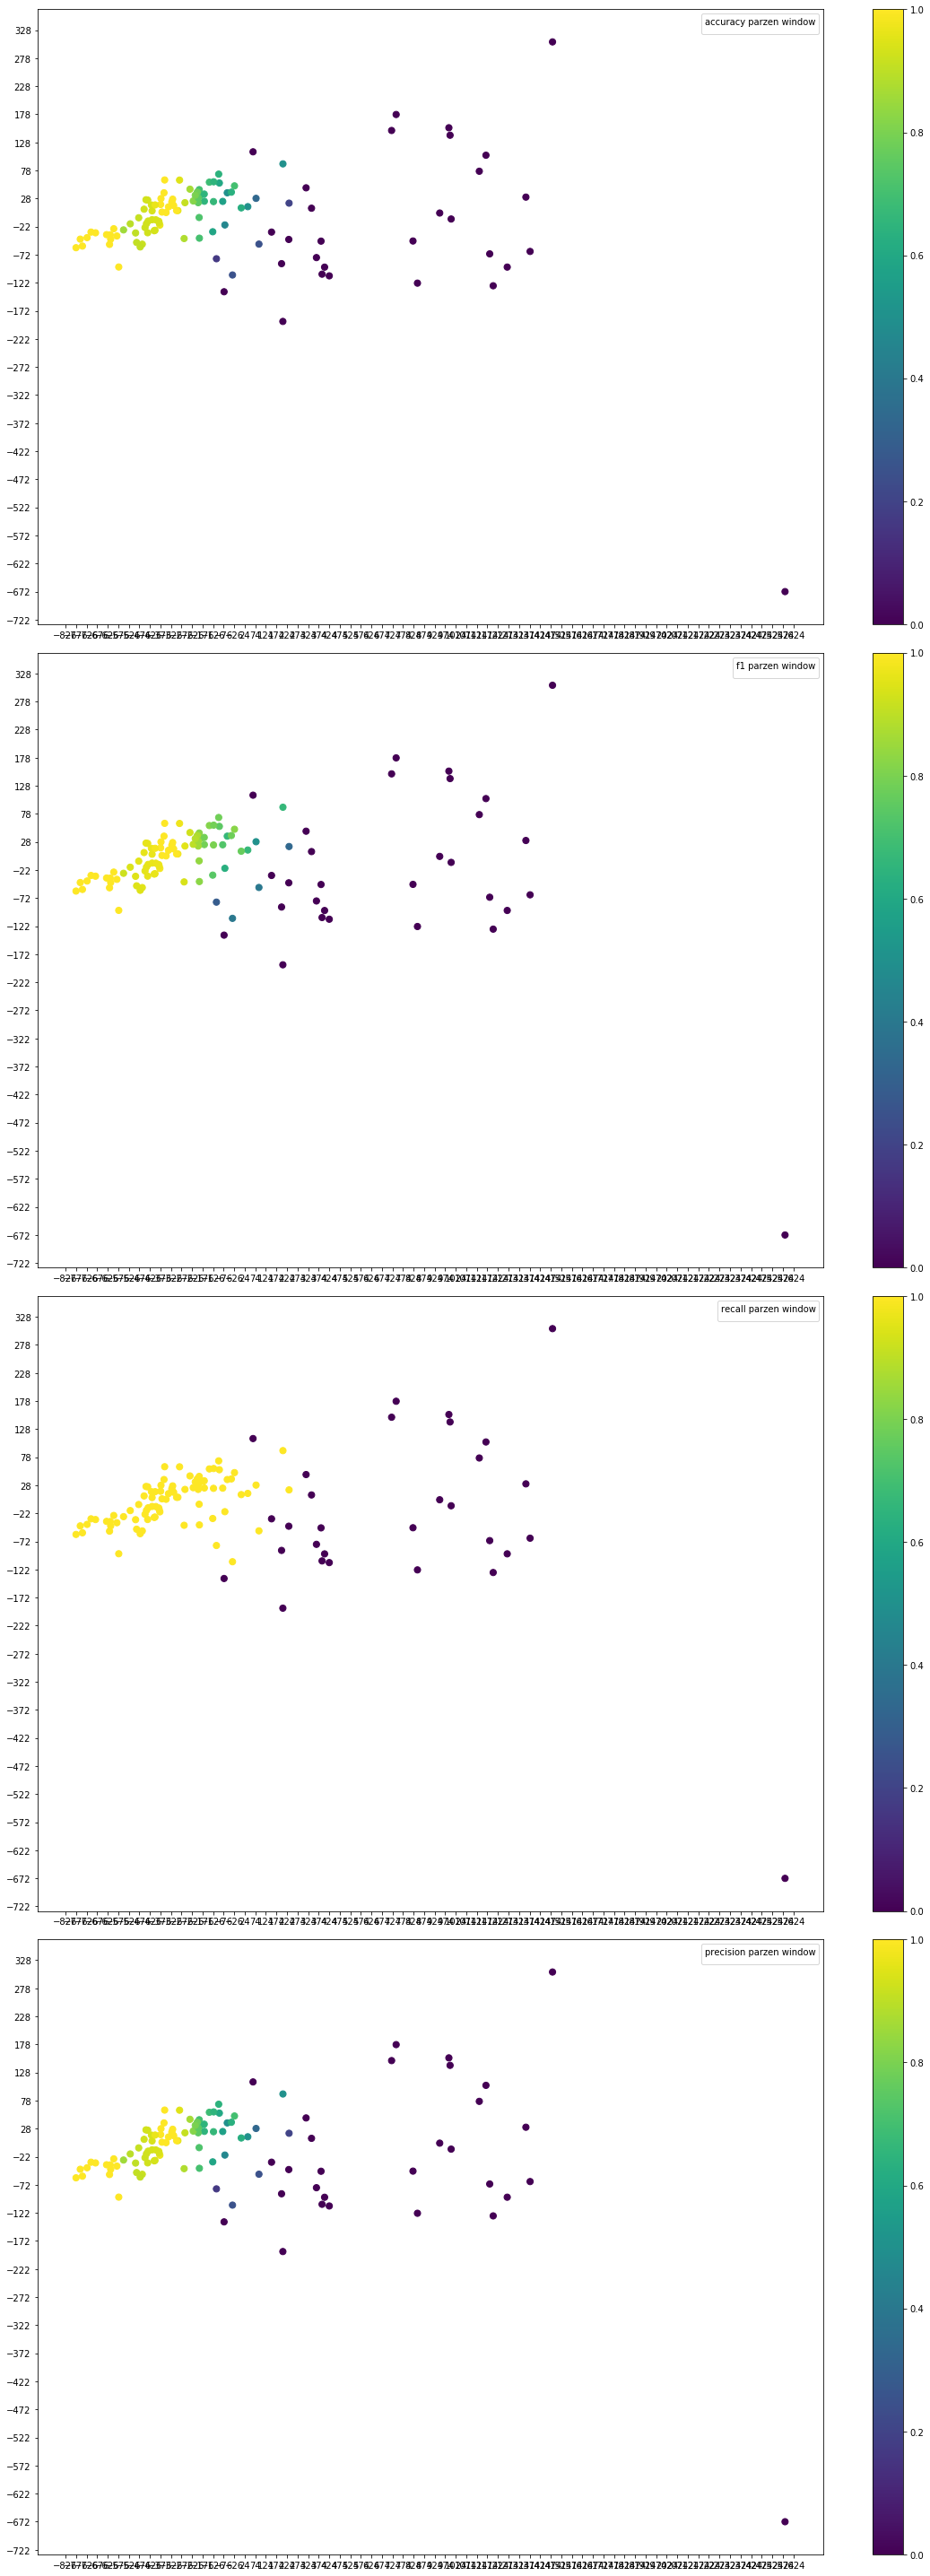

In [13]:
SVM_zod.gen_parzen(radius = 100)

SVM_zod.parzen_plot(metrics=["accuracy","f1","recall","precision"])

In [38]:
RF_zod.gen_parzen(radius=100)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

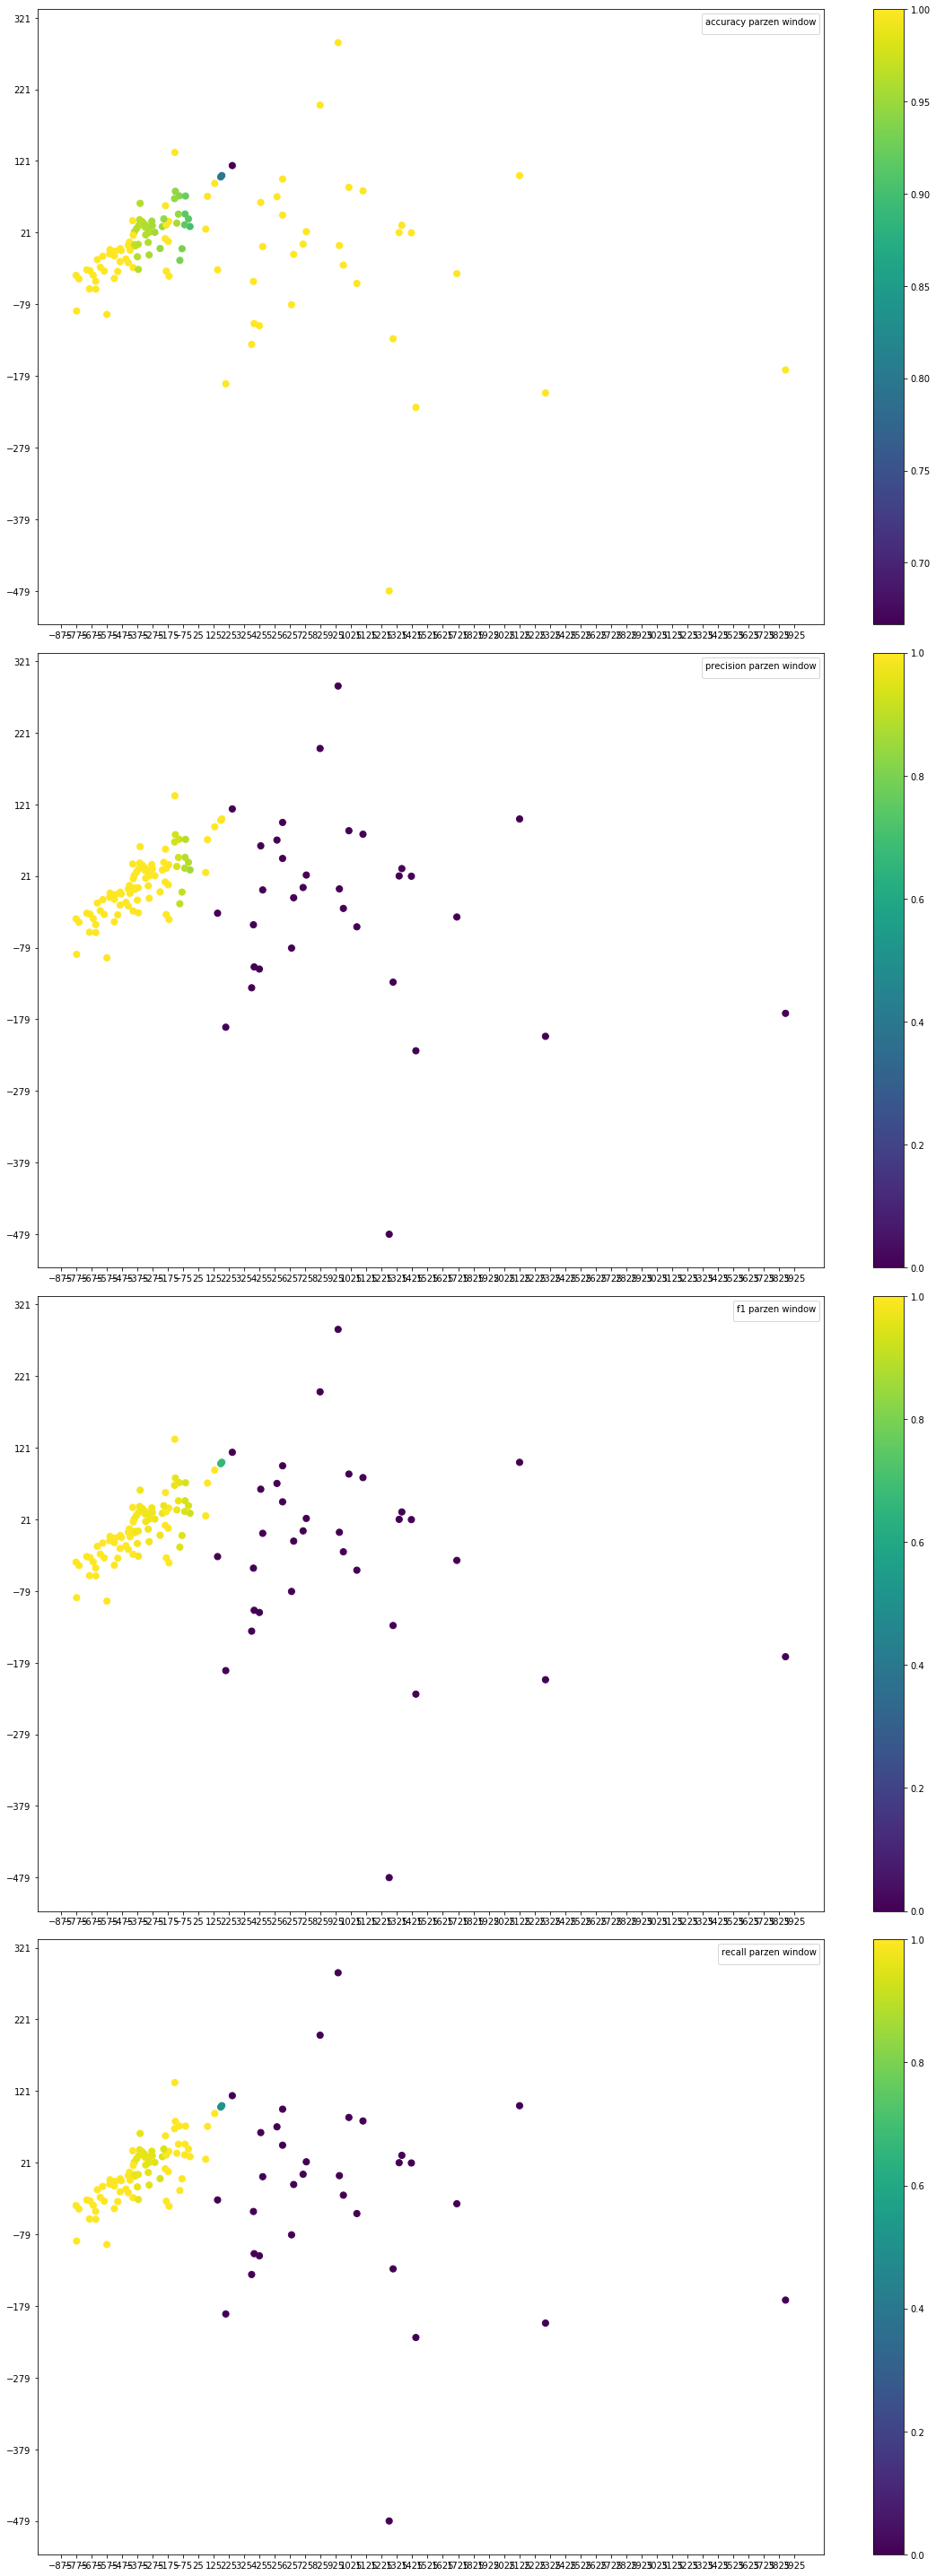

In [39]:
RF_zod.parzen_plot(metrics=["accuracy","precision","f1","recall"])

### Again the recall, f1, and precision plots for Random Forest also seem to have many local low socres for sparse data points, although the overall scores for these metrics are pretty high